In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [75]:
df=pd.read_csv('Mall_Customers .csv')
df.columns=['CustomerID','Gender','Age','Annual Income','Spending Score']

In [76]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [77]:
df.tail()

,CustomerID,Gender,Age,Annual Income,Spending Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [79]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [80]:
# check missing values
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [81]:
# droping the column which is not required for our analysis
df.drop(columns=['CustomerID', 'Gender'], inplace=True, axis=1)

## EDA

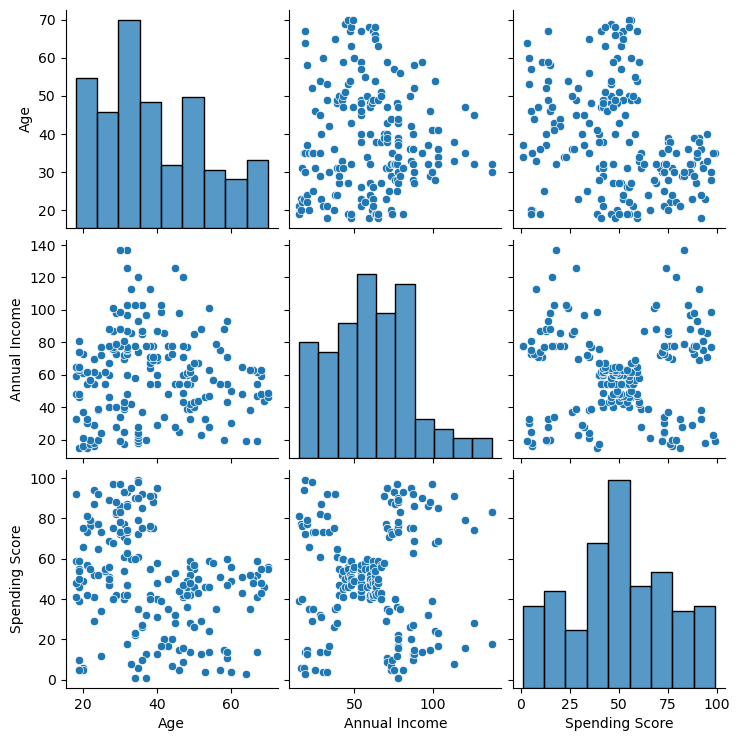

In [82]:
sns.pairplot(df)
plt.show()

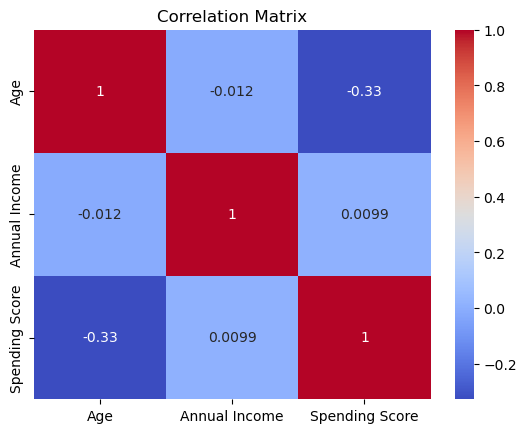

In [83]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [84]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df=pd.DataFrame(scaled_data, columns=df.columns)
df.head()

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [85]:
# Train model 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


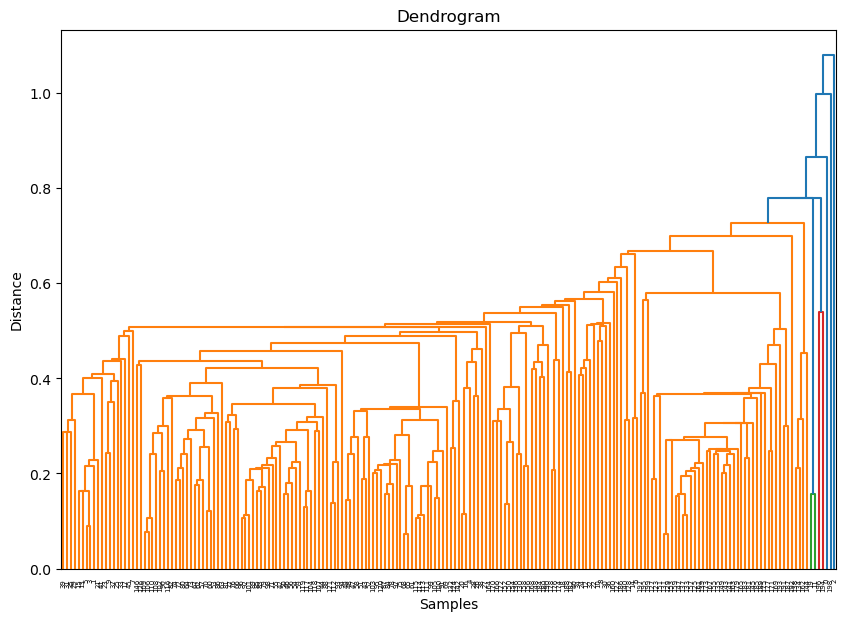

In [86]:
# create the dendrogram 
linked = linkage(df, method='single')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

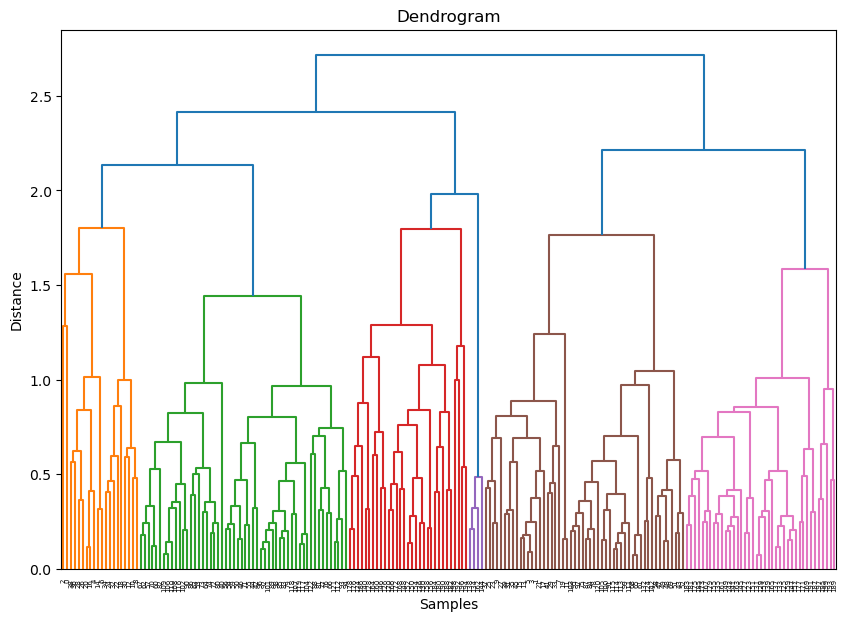

In [87]:
# create the dendrogram 
linked = linkage(df, method='average')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

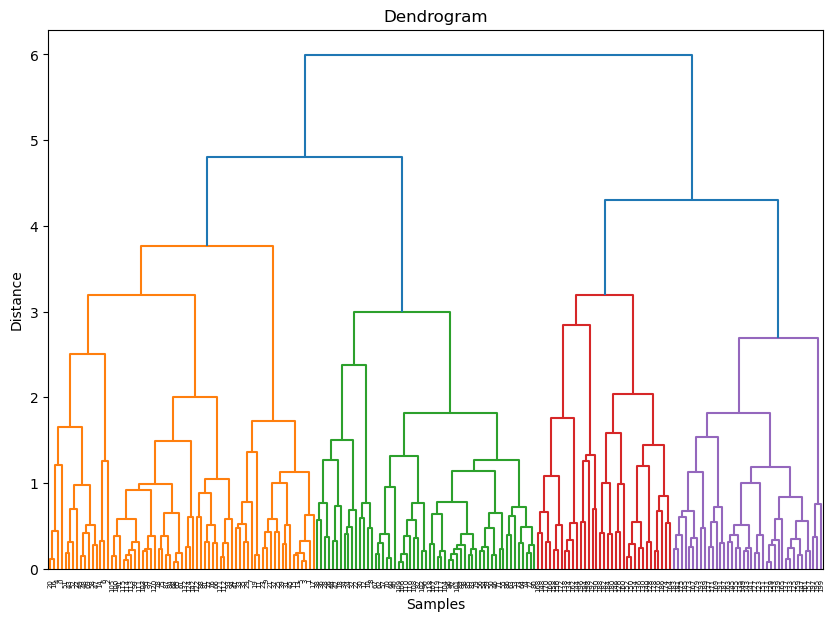

In [88]:
# create the dendrogram 
linked = linkage(df, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

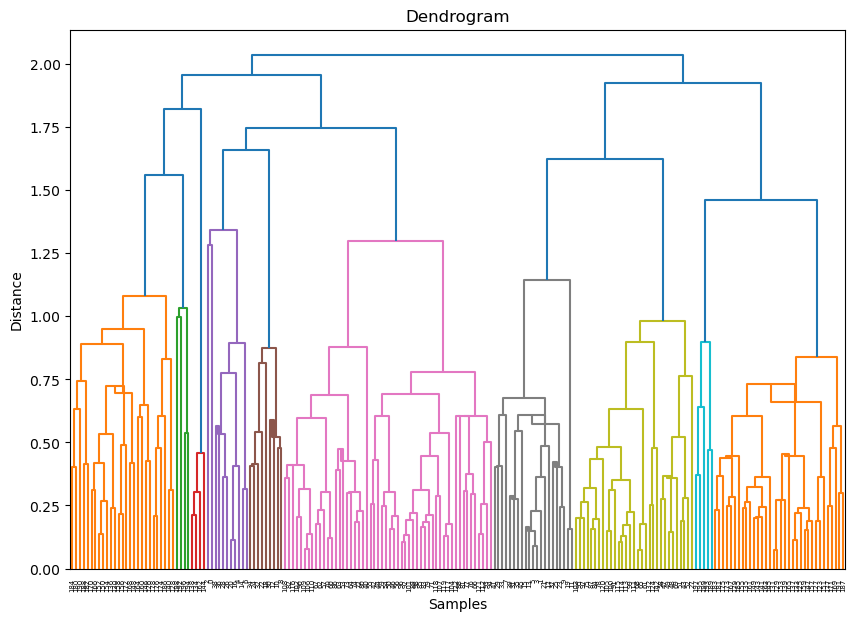

In [89]:
# create the dendrogram 
linked = linkage(df, method='centroid')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [90]:
# train mode 
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5,linkage='ward')
agglomerative_clusters=model.fit(df)
df['labels']= agglomerative_clusters.labels_

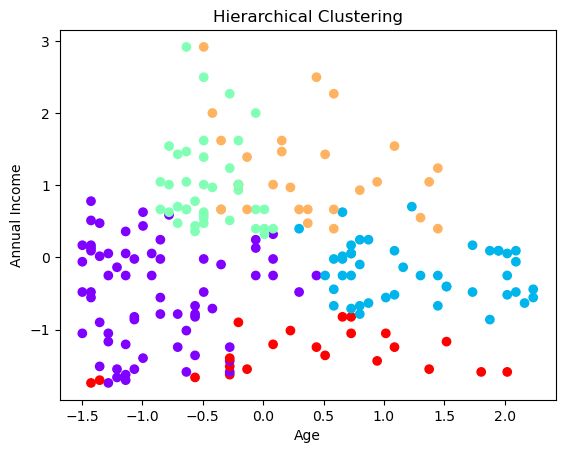

In [91]:
# visualization 
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=model.labels_, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [ ]:
df.head()

,Age,Annual Income,Spending Score,labels
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,4


In [99]:
# save the model
import joblib
joblib.dump(model, 'hierarchical_model.pkl')

['hierarchical_model.pkl']

In [93]:
# save the dataset
df.to_csv('Mall_Customers_Clustered.csv', index=False)

In [95]:
## Try supervised model
x=df.drop(columns=['labels'])
y=df['labels']

# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [103]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.75      1.00      0.86         6
           2       1.00      1.00      1.00         5
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00         3

    accuracy                           0.93        40
   macro avg       0.94      0.96      0.94        40
weighted avg       0.94      0.93      0.93        40

Confusion Matrix:
 [[14  2  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  5  0  0]
 [ 1  0  0  9  0]
 [ 0  0  0  0  3]]
Accuracy Score: 0.925


In [104]:
import joblib
joblib.dump(dt_classifier, 'dt_classifier.pkl')

['dt_classifier.pkl']